In [86]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim

In [87]:
X, y = make_classification(n_samples=1000, n_features=20, shuffle=True, random_state=2004)
X = X.astype(np.float32)
y = y.astype(np.float32).reshape(-1, 1)

In [88]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=2004
)

In [89]:
X_train_t = torch.from_numpy(X_train)
y_train_t = torch.from_numpy(y_train)
X_test_t = torch.from_numpy(X_test)
y_test_t = torch.from_numpy(y_test)

# Без Dropout

In [90]:
model_wdr = nn.Sequential(
    nn.Linear(20, 4),
    nn.ReLU(),
    nn.Linear(4, 1),
    nn.Sigmoid()
)

In [91]:
criterion_wdr = nn.BCELoss()

## SGD

In [92]:
model_sgd_wdr = model_wdr

In [93]:
optimizer_sgd_wdr = optim.SGD(model_sgd_wdr.parameters(), lr=0.01)

In [94]:
losses_sgd_wdr = []
for epoch in range(1000):
    optimizer_sgd_wdr.zero_grad()
    y_pred_sgd_wdr = model_sgd_wdr(X_train_t)
    loss_sgd_wdr = criterion_wdr(y_pred_sgd_wdr, y_train_t)
    loss_sgd_wdr.backward()
    optimizer_sgd_wdr.step()
    losses_sgd_wdr.append(loss_sgd_wdr.item())

In [95]:
print(min(losses_sgd_wdr), max(losses_sgd_wdr))

0.28371915221214294 0.7060291767120361


## Adam

In [96]:
model_adam_wdr = model_wdr

In [97]:
optimizer_adam_wdr = optim.Adam(model_adam_wdr.parameters(), lr=0.01)

In [98]:
losses_adam_wdr = []
for epoch in range(1000):
    optimizer_adam_wdr.zero_grad()
    y_pred_adam_wdr = model_adam_wdr(X_train_t)
    loss_adam_wdr = criterion_wdr(y_pred_adam_wdr, y_train_t)
    loss_adam_wdr.backward()
    optimizer_adam_wdr.step()
    losses_adam_wdr.append(loss_adam_wdr.item())

In [99]:
print(min(losses_adam_wdr), max(losses_adam_wdr))

0.10926073044538498 0.283528208732605


## RMSProp


In [100]:
model_rmsprop_wdr = model_wdr

In [101]:
optimizer_rsmprop_wdr = optim.RMSprop(model_rmsprop_wdr.parameters(), lr=0.01)

In [102]:
losses_rsmprop_wdr = []
for epoch in range(1000):
    optimizer_rsmprop_wdr.zero_grad()
    y_pred_rsmprop_wdr = model_rmsprop_wdr(X_train_t)
    loss_rsmprop_wdr = criterion_wdr(y_pred_rsmprop_wdr, y_train_t)
    loss_rsmprop_wdr.backward()
    optimizer_rsmprop_wdr.step()
    losses_rsmprop_wdr.append(loss_rsmprop_wdr.item())

In [103]:
print(min(losses_rsmprop_wdr), max(losses_rsmprop_wdr))

0.1085827425122261 0.17763470113277435


## Сравнение

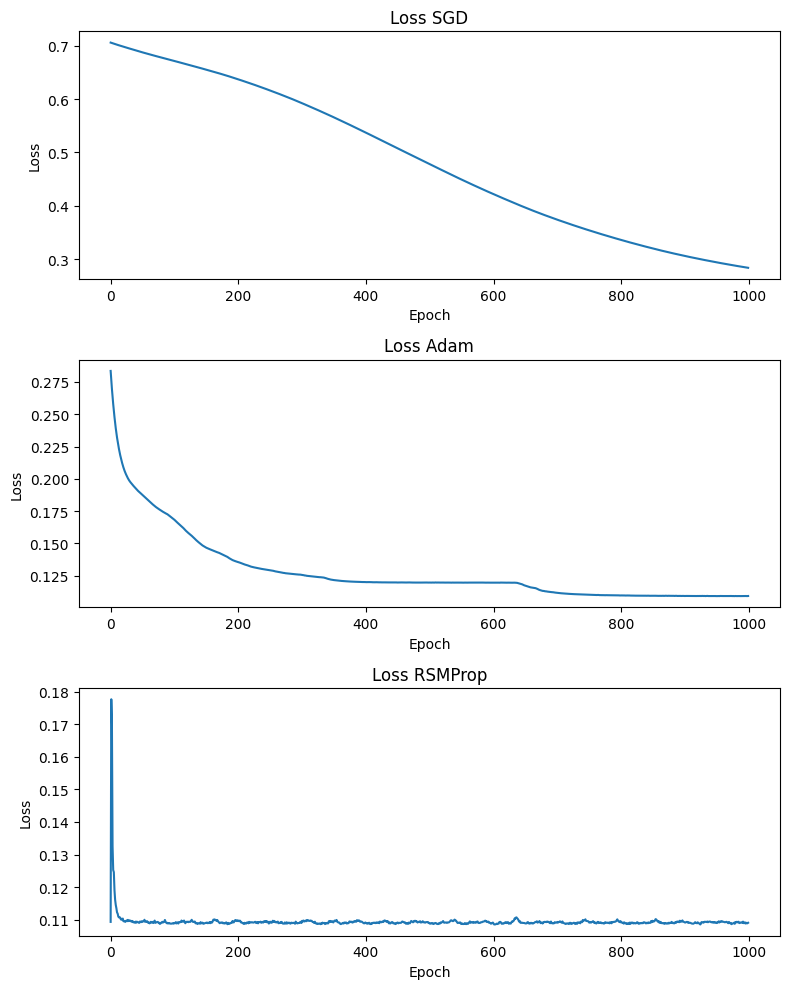

In [104]:
plt.figure(figsize=(8, 10))

plt.subplot(3, 1, 1)
plt.plot(losses_sgd_wdr)
plt.title("Loss SGD")
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.subplot(3, 1, 2)
plt.plot(losses_adam_wdr)
plt.title("Loss Adam")
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.subplot(3, 1, 3)
plt.plot(losses_rsmprop_wdr)
plt.title("Loss RSMProp")
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.tight_layout()
plt.show()

Проводил тесты при низком lr. И здесь видно, что SGD не успела сойтись за 1000 эпох. Adam имеет плавную сходимость и сравнительно низкий loss, но не самый низкий. RSMProp не такой стабильный как Adam, но при этом имеет самое низкое итоговое значение ошибки.

# С Dropout

In [105]:
model_dr = nn.Sequential(
    nn.Linear(20, 4),
    nn.ReLU(),
    nn.Dropout(p=0.3),
    nn.Linear(4, 1),
    nn.Sigmoid()
)

In [106]:
criterion_dr = nn.BCELoss()

## SGD

In [107]:
model_sgd_dr = model_dr

In [108]:
optimizer_sgd_dr = optim.SGD(model_sgd_dr.parameters(), lr=0.1)

In [109]:
losses_sgd_dr = []
for epoch in range(1000):
    optimizer_sgd_dr.zero_grad()
    y_pred_sgd_dr = model_sgd_dr(X_train_t)
    loss_sgd_dr = criterion_dr(y_pred_sgd_dr, y_train_t)
    loss_sgd_dr.backward()
    optimizer_sgd_dr.step()
    losses_sgd_dr.append(loss_sgd_dr.item())

In [110]:
print(min(losses_sgd_dr), max(losses_sgd_dr))

0.2359711229801178 0.6770367622375488


## Adam

In [111]:
model_adam_dr = model_dr

In [112]:
optimizer_adam_dr = optim.Adam(model_adam_dr.parameters(), lr=0.1)

In [113]:
losses_adam_dr = []
for epoch in range(1000):
    optimizer_adam_dr.zero_grad()
    y_pred_adam_dr = model_adam_dr(X_train_t)
    loss_adam_dr = criterion_dr(y_pred_adam_dr, y_train_t)
    loss_adam_dr.backward()
    optimizer_adam_dr.step()
    losses_adam_dr.append(loss_adam_dr.item())

In [114]:
print(min(losses_adam_dr), max(losses_adam_dr))

0.22860747575759888 0.3257860541343689


## RSMProp

In [115]:
model_rmsprop_dr = model_dr

In [116]:
optimizer_rsmprop_dr = optim.RMSprop(model_rmsprop_dr.parameters(), lr=0.1)

In [117]:
losses_rsmprop_dr = []
for epoch in range(1000):
    optimizer_rsmprop_dr.zero_grad()
    y_pred_rsmprop_dr = model_rmsprop_dr(X_train_t)
    loss_rsmprop_dr = criterion_dr(y_pred_rsmprop_dr, y_train_t)
    loss_rsmprop_dr.backward()
    optimizer_rsmprop_dr.step()
    losses_rsmprop_dr.append(loss_rsmprop_dr.item())

In [118]:
print(min(losses_rsmprop_dr), max(losses_rsmprop_dr))

0.22298778593540192 1.720650315284729


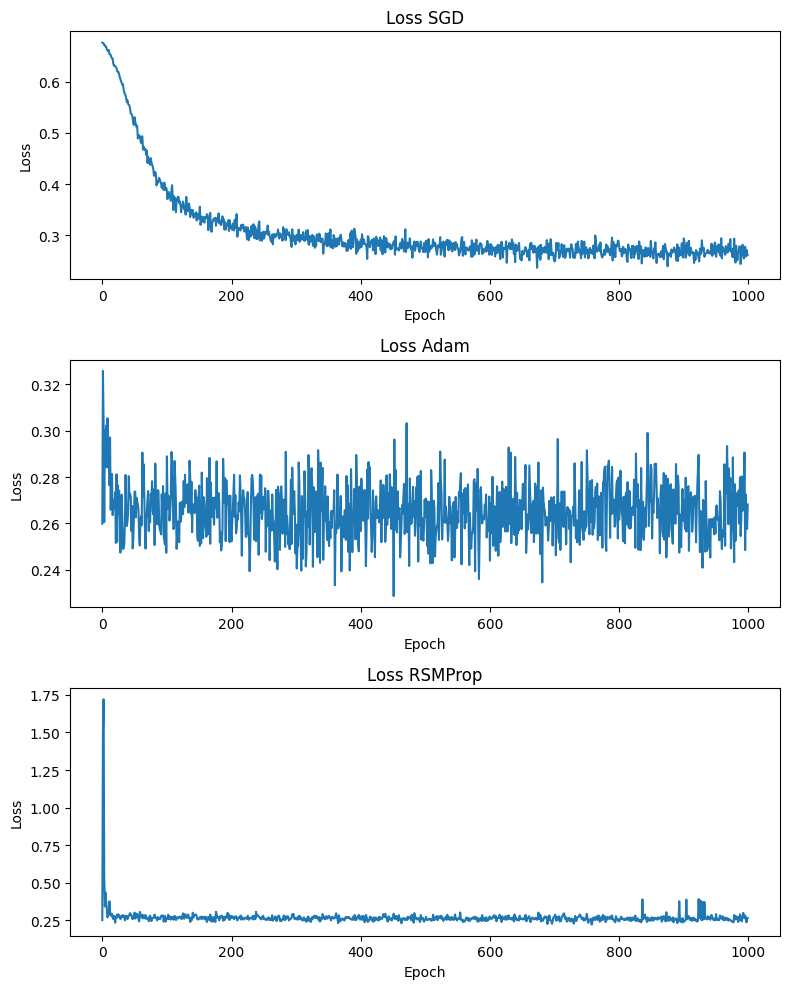

In [119]:
plt.figure(figsize=(8, 10))

plt.subplot(3, 1, 1)
plt.plot(losses_sgd_dr)
plt.title("Loss SGD")
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.subplot(3, 1, 2)
plt.plot(losses_adam_dr)
plt.title("Loss Adam")
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.subplot(3, 1, 3)
plt.plot(losses_rsmprop_dr)
plt.title("Loss RSMProp")
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.tight_layout()
plt.show()

Проверял при двух lr: 0.1, 0.01. SGD при высокой и низкой lr, примерный уровень стабильности сохраняется. Схождение быстрее при низких. Adam при высокой lr имеет плохой уровень стабильности, а при низкой хороший. А RSMprop имеет обратную ситуацию. Adam и RSMProp имеют примерно тот же вид, что и без dropout, только получают такой вид при разных lr